In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
import plotly.graph_objects as go

In [111]:
# read dataset
train = pd.read_csv('TRAIN.csv')
test =  pd.read_csv('TEST_FINAL.csv')

In [83]:
# get copy of train and test dataset
tn = train.copy()
tt = test.copy()

In [84]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


### EDA & Preprocessing 

In [86]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


df = train.groupby(['Store_Type','Location_Type']).size().unstack('Location_Type',fill_value=0)
df.plot.bar()
df1 = train.groupby(['Store_Type','Region_Code']).size().unstack('Region_Code',fill_value=0)
df1.plot.bar()

sns.catplot(x="Store_Type", y="Sales",hue='Location_Type',data=train)

In [87]:
# Let's print the number unique Store_id,Store_Type,Location_Type,Region_Code
print('No of Unique stores are ',train['Store_id'].nunique())
print('No of Unique Store Type is ',train['Store_Type'].nunique())
print('No of Unique Location Type is ',train['Location_Type'].nunique())
print('No of Unique Region Code is ',train['Region_Code'].nunique())
print('No of Holiday variable is ',train['Holiday'].nunique())
print('No of Unique Discount is ',train['Discount'].nunique())

No of Unique stores are  365
No of Unique Store Type is  4
No of Unique Location Type is  5
No of Unique Region Code is  4
No of Holiday variable is  2
No of Unique Discount is  2


In [88]:
# Check for the null values
train.isnull().sum().any()
# No nullvalues present

False

In [89]:
# We could drop # Order colum
train.drop(['#Order'],axis=1,inplace=True)

In [90]:
# Let's start the preprocessing for both train and test data together
day = pd.to_datetime(train['Date'])
train['Year'] = day.dt.year
train['Month'] = day.dt.month
train['week'] = day.dt.week
train['Day'] = day.dt.day
train['Quarter'] = day.dt.quarter
train['weekday']  = day.dt.weekday
# Drop date columms
#train.drop(['Date'],axis=1,inplace=True)

In [91]:
day = pd.to_datetime(test['Date'])
test['Year'] = day.dt.year
test['Month'] = day.dt.month
test['Day'] = day.dt.day
test['week'] = day.dt.week
test['Quarter'] = day.dt.quarter
test['weekday']  = day.dt.weekday
# Drop date columms
#test.drop(['Date'],axis=1,inplace=True)

#### Target Variable

Here, the target variable is skewed, so we have to do some transformations

In [102]:
train['Sales'].describe([0.01,0.05,0.25,0.5,0.75,0.95,0.99])

count    184571.000000
mean      42396.638602
std       16461.053593
min        7089.000000
1%        13637.100000
5%        20184.000000
25%       30610.260000
50%       39678.000000
75%       51567.000000
95%       74236.500000
99%       91154.700000
max      102150.000000
Name: Sales, dtype: float64

In [95]:
train = train[(train['Sales']>1)] # remove data with the values zero
train = train[train['Sales']<91154]  # remove the values in greter than 99% dist

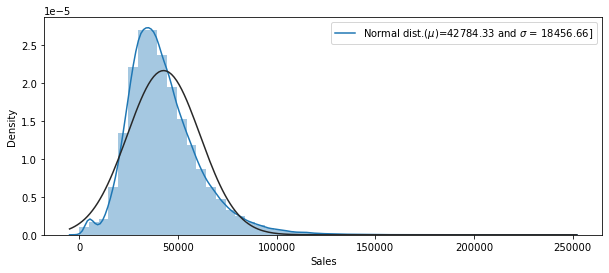

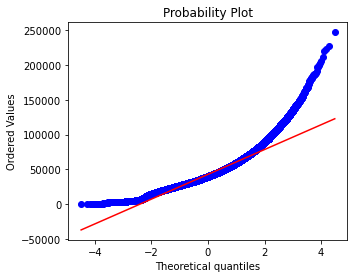

In [93]:
#Let's visualize the target variable 'Sales'
plt.figure(figsize=(10,4))
sns.distplot(train['Sales'],fit=norm)
# Get normlization parameters
(mu,sigma) = norm.fit(train['Sales'])
plt.legend(['Normal dist.($\mu$)={:.2f} and $\sigma$ = {:.2f}]'.format(mu,sigma)])
# let's plot qqplot

plt.figure(figsize=(5,4))
qqplot = stats.probplot(train['Sales'],plot=plt)

train = train[train['Sales']< 100000]
train = train[train['Sales']>1]

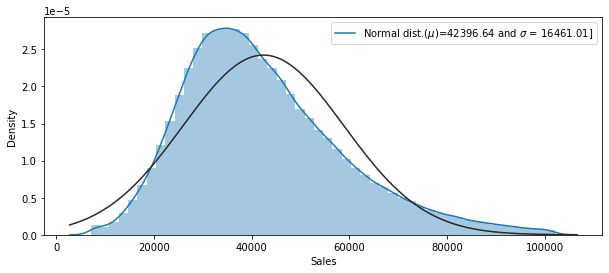

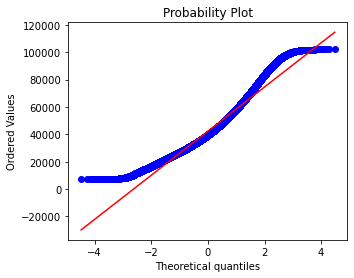

In [96]:
#Let's visualize the target variable 'Sales'
plt.figure(figsize=(10,4))
sns.distplot(train['Sales'],fit=norm)
# Get normlization parameters
(mu,sigma) = norm.fit(train['Sales'])
plt.legend(['Normal dist.($\mu$)={:.2f} and $\sigma$ = {:.2f}]'.format(mu,sigma)])
# let's plot qqplot

plt.figure(figsize=(5,4))
qqplot = stats.probplot(train['Sales'],plot=plt)

#transform target features
train['Sales_log'] = np.log1p(train['Sales'])

### Train Model - Pycaret

In [113]:
#Pycaret module
from pycaret.regression import *

In [114]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [115]:
# Fit the model
cat_features = ['Store_Type','Location_Type','Region_Code','Discount','weekday', 'Quarter','Month']

num_features = ['Day','Year','Holiday','Store_id','week']
model_train = setup(data = train, target = 'Sales', categorical_features = cat_features,
                   numeric_features = num_features,ignore_features= ['ID'],silent = True,
                   train_size = 0.8,fold=3,session_id = 123,verbose=False,transform_target=True,
                   transform_target_method='yeo-johnson',normalize = True)

ValueError: Column type forced is either target column or doesn't exist in the dataset.

In [17]:
# comapare all base the models 
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,5218.8130,52775398.6667,7264.6598,0.8047,0.1787,0.1347,6.8467
catboost,CatBoost Regressor,5275.5319,54237357.5918,7364.5724,0.7993,0.1791,0.1354,11.2067
rf,Random Forest Regressor,5750.1110,64850790.8654,8052.9874,0.7601,0.1954,0.1470,27.4233
lightgbm,Light Gradient Boosting Machine,5882.7101,66310038.3052,8143.0691,0.7547,0.1972,0.1510,1.0233
gbr,Gradient Boosting Regressor,6790.1205,89083642.5521,9438.3871,0.6704,0.2299,0.1772,8.0533
et,Extra Trees Regressor,6784.8269,89817598.0779,9477.1795,0.6677,0.2295,0.1730,37.7267
knn,K Neighbors Regressor,7264.7220,99245637.3602,9962.1888,0.6328,0.2379,0.1861,16.2867
ridge,Ridge Regression,7199.6979,100727317.3333,10036.2799,0.6274,0.2445,0.1886,1.1367
lr,Linear Regression,7199.8784,100736818.6667,10036.7520,0.6273,0.2445,0.1887,1.6100
br,Bayesian Ridge,7199.6462,100728760.0882,10036.3520,0.6273,0.2445,0.1886,0.4933


1 - Catboost

In [150]:
catb = create_model('catboost') #0.1791
#catb_tuned = tune_model(catb,optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5257.4132,54461496.7080,7379.8033,0.7964,0.1797,0.1352
1,5305.5974,54445101.1756,7378.6924,0.8001,0.1793,0.1359
2,5263.5849,53805474.8918,7335.2215,0.8015,0.1782,0.1351
Mean,5275.5319,54237357.5918,7364.5724,0.7993,0.1791,0.1354
SD,21.4083,305460.5302,20.7592,0.0021,0.0006,0.0004


In [44]:
# Finalize the model
catb_final = finalize_model(catb)

2 - XGBoost

In [116]:
xgb = create_model('xgboost') #0.1787
#xgb_tuned = tune_model(xgb,optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5208.7598,52927144.0000,7275.1045,0.8021,0.1793,0.1346
1,5240.5093,52840544.0000,7269.1504,0.8060,0.1788,0.1351
2,5207.1699,52558508.0000,7249.7246,0.8061,0.1781,0.1344
Mean,5218.8130,52775398.6667,7264.6598,0.8047,0.1787,0.1347
SD,15.3553,157387.1256,10.8369,0.0018,0.0005,0.0003


In [117]:
xgb_tuned = tune_model(xgb,optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5344.0933,55507772.0000,7450.3540,0.7925,0.1837,0.1382
1,5353.1035,54833064.0000,7404.9351,0.7987,0.1826,0.1382
2,5361.0034,55373652.0000,7441.3477,0.7957,0.1830,0.1385
Mean,5352.7334,55238162.6667,7432.2122,0.7956,0.1831,0.1383
SD,6.9085,291634.1783,19.6352,0.0025,0.0005,0.0001


In [20]:
# Finalize the model
xgb_final = finalize_model(xgb)

In [121]:
(xgb_final)

PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                n_estimators=100, n_jobs=-1,
                                nu...
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=-1,
                                                    

In [118]:
evaluate_model(xgb_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

3 - LGMB

In [153]:
lgbm = create_model('lightgbm') #0.2285
#lgbm_tuned = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5869.8920,66289128.6572,8141.8136,0.7522,0.1972,0.1508
1,5905.9586,66750157.2920,8170.0769,0.7549,0.1979,0.1515
2,5872.2797,65890828.9665,8117.3166,0.7569,0.1967,0.1509
Mean,5882.7101,66310038.3052,8143.0691,0.7547,0.1972,0.1510
SD,16.4680,351130.7475,21.5576,0.0019,0.0005,0.0003


In [26]:
# Finalize the model
lgbm_final = finalize_model(lgbm)

4 - Random Forest

In [27]:
rf = create_model('rf') #0.2285

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5924.0214,72430559.9987,8510.6145,0.7731,0.2006,0.1506
1,5903.0165,71354562.1814,8447.1630,0.7756,0.2004,0.1510
2,5946.8521,72707132.9801,8526.8478,0.7744,0.1994,0.1508
Mean,5924.6300,72164085.0534,8494.8751,0.7744,0.2001,0.1508
SD,17.9010,583448.7202,34.3823,0.0010,0.0005,0.0001


### Stacking Models

In [156]:
# stack trained models
stacked_models = stack_models(estimator_list=[catb,xgb])
# stack trained models
#stacked_models = stack_models(estimator_list=[catb,lgbm,xgb],meta_model = xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5133.8196,51362042.9196,7166.7317,0.8080,0.1772,0.1329
1,5174.8833,51332042.3024,7164.6383,0.8115,0.1763,0.1333
2,5138.1086,50984432.8707,7140.3384,0.8119,0.1756,0.1326
Mean,5148.9372,51226172.6976,7157.2361,0.8105,0.1763,0.1330
SD,18.4301,171374.0882,11.9790,0.0018,0.0006,0.0003


In [157]:
#Test predictions
test_predictions = predict_model(stacked_models, data=test)

In [158]:
# submission file
sub_stack = test_predictions[['ID','Label']]
sub_stack.rename({'Label':'Sales'},axis=1,inplace=True)

In [159]:
sub_stack['Sales'] = sub_stack['Sales'].round(2)

In [166]:
sub_stack.to_csv('final.csv',index=False)

In [167]:
sub_stack

,ID,Sales
0,T1188341,52764.48
1,T1188342,40402.61
2,T1188343,78114.16
3,T1188344,38922.65
4,T1188345,40917.10
...,...,...
22260,T1210601,17308.45
22261,T1210602,50717.36
22262,T1210603,40836.37
22263,T1210604,26780.30


### Blending Models

In [162]:
# blend models
blender = blend_models(estimator_list=[catb,xgb])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5186.5492,52688187.4410,7258.6629,0.8030,0.1782,0.1338
1,5223.6398,52585262.9208,7251.5697,0.8069,0.1776,0.1344
2,5186.1351,52183659.3226,7223.8258,0.8075,0.1768,0.1336
Mean,5198.7747,52485703.2281,7244.6861,0.8058,0.1775,0.1339
SD,17.5831,217671.3959,15.0320,0.0020,0.0005,0.0003


In [163]:
# Test predictions
test_predictions = predict_model(blender, data=test)

In [164]:
# submission file
sub_blend = test_predictions[['ID','Label']]
sub_blend.rename({'Label':'Sales'},axis=1,inplace=True)

In [165]:
sub_blend['Sales'] = sub_blend['Sales'].round(2)

In [ ]:
sub_blend.to_csv('submission_blend.csv',index=False)

## Visualization

In [21]:
# Test predictions
test_predictions = predict_model(xgb_final, data=test)

In [42]:
# get label from predictions
tt = pd.concat([tt,test_predictions['Label']],axis=1)

In [67]:
# Get data for each stores separetaly
var = 180
train_sub = tn[tn['Store_id']==var]
test_sub = tt[tt['Store_id']==var]
# visualize predictions
fig = go.Figure()
fig.add_trace(go.Scatter(
                    x = train_sub.Date,
                    y = train_sub.Sales,
                    mode = 'lines',
                    name = 'Train data',
                    marker_color='green'))
fig.add_trace(go.Scatter(
                    x = test_sub.Date,
                    y = test_sub.Label,
                    mode = 'lines',
                    name = 'Predictions',
                    marker_color='orange'))
fig.update_layout(width=1000,height=600,
                 title={'text':'StoreId - '+str(var)})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Sales')
fig.show()

In [112]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [106]:
test_sub

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Label
25,T1188366,180,S1,L3,R2,2019-06-01,0,No,32837.261719
596,T1188937,180,S1,L3,R2,2019-06-02,0,No,29877.628906
966,T1189307,180,S1,L3,R2,2019-06-03,0,No,27796.177734
1252,T1189593,180,S1,L3,R2,2019-06-04,0,No,27312.376953
1662,T1190003,180,S1,L3,R2,2019-06-05,1,No,30292.150391
...,...,...,...,...,...,...,...,...,...
20530,T1208871,180,S1,L3,R2,2019-07-27,0,No,31458.960938
20830,T1209171,180,S1,L3,R2,2019-07-28,0,No,31190.367188
21237,T1209578,180,S1,L3,R2,2019-07-29,0,No,26097.994141
21806,T1210147,180,S1,L3,R2,2019-07-30,0,No,26539.919922
